In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.strategy.indicators.notebook_utils import loadData
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [3]:
dataset, features = loadData(indicators=['cci', 'ultimate_oscillator', 'optimal_v2'],
                            param_spec={},
                            optimal_threshold=0.8,
                            optimal_mode='buy',
                            spans=[{'indicator_name':'roc',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]},
                                    {'indicator_name':'roc',
                                    'column_name': 'UltimateOscillator',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'UltimateOscillator',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60,120]}
                                    ],

                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from chunk 11...


In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset

,time,high,low,close,open,volume,CCI,RSI,Optimal_v2,RateOfChange_CCI_period_1,...,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_close_period_120,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_close_period_60,Momentum_close_period_120
520,1502973779999,4431.13,4431.13,4424.499701,4431.13,0.179310,0.519131,0.583171,0.0,0.034164,...,0.492367,0.478409,0.434878,0.375478,0.422816,0.504378,0.474838,0.538353,0.515696,0.560535
521,1502973839999,4431.13,4431.13,4427.814850,4431.13,0.000000,0.519058,0.583171,0.0,0.034163,...,0.484482,0.481513,0.437362,0.376929,0.424739,0.499715,0.476355,0.539730,0.516496,0.561440
522,1502973899999,4431.13,4431.13,4429.472425,4431.13,0.000000,0.518988,0.583171,0.0,0.034163,...,0.480549,0.478257,0.438603,0.377655,0.425701,0.497383,0.474768,0.540419,0.516896,0.561892
523,1502973959999,4431.13,4431.13,4430.301213,4431.13,0.000000,0.518917,0.583171,0.0,0.034163,...,0.478585,0.476632,0.439224,0.378017,0.426182,0.496217,0.473975,0.540764,0.517097,0.562118
524,1502974019999,4431.13,4431.13,4430.715606,4431.13,0.000000,0.518847,0.583171,0.0,0.034163,...,0.477603,0.483418,0.439535,0.378401,0.426422,0.495634,0.477286,0.540936,0.517309,0.562231
525,1502974079999,4431.13,4431.13,4430.922803,4431.13,0.000000,0.518777,0.583171,0.0,0.034163,...,0.477112,0.477423,0.439690,0.378593,0.426542,0.495343,0.474362,0.541022,0.517415,0.562288
526,1502974139999,4430.00,4420.50,4425.711402,4430.00,0.077498,0.516420,0.569623,0.0,0.034163,...,0.464283,0.469491,0.436297,0.376518,0.417810,0.487721,0.470479,0.539139,0.516272,0.558176
527,1502974199999,4420.00,4411.00,4418.355701,4420.00,0.622000,0.513387,0.557728,0.0,0.034163,...,0.459185,0.461114,0.428137,0.373541,0.407816,0.484705,0.466375,0.534611,0.514631,0.553438
528,1502974259999,4420.00,4420.00,4419.177850,4420.00,0.024782,0.515178,0.567096,0.0,0.034164,...,0.478574,0.461110,0.426998,0.377810,0.404831,0.496208,0.466372,0.533977,0.517004,0.552012
529,1502974319999,4420.00,4420.00,4419.588925,4420.00,0.000000,0.515122,0.567096,0.0,0.034163,...,0.477598,0.461108,0.431740,0.382945,0.405390,0.495630,0.466371,0.536611,0.519845,0.552279


In [6]:
final_dataset = dataset

In [7]:
dataset = []

In [8]:
final_dataset

,time,high,low,close,open,volume,CCI,RSI,Optimal_v2,RateOfChange_CCI_period_1,...,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_close_period_120,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_close_period_60,Momentum_close_period_120
520,1502973779999,4431.13,4431.13,4424.499701,4431.13,0.179310,0.519131,0.583171,0.0,0.034164,...,0.492367,0.478409,0.434878,0.375478,0.422816,0.504378,0.474838,0.538353,0.515696,0.560535
521,1502973839999,4431.13,4431.13,4427.814850,4431.13,0.000000,0.519058,0.583171,0.0,0.034163,...,0.484482,0.481513,0.437362,0.376929,0.424739,0.499715,0.476355,0.539730,0.516496,0.561440
522,1502973899999,4431.13,4431.13,4429.472425,4431.13,0.000000,0.518988,0.583171,0.0,0.034163,...,0.480549,0.478257,0.438603,0.377655,0.425701,0.497383,0.474768,0.540419,0.516896,0.561892
523,1502973959999,4431.13,4431.13,4430.301213,4431.13,0.000000,0.518917,0.583171,0.0,0.034163,...,0.478585,0.476632,0.439224,0.378017,0.426182,0.496217,0.473975,0.540764,0.517097,0.562118
524,1502974019999,4431.13,4431.13,4430.715606,4431.13,0.000000,0.518847,0.583171,0.0,0.034163,...,0.477603,0.483418,0.439535,0.378401,0.426422,0.495634,0.477286,0.540936,0.517309,0.562231
525,1502974079999,4431.13,4431.13,4430.922803,4431.13,0.000000,0.518777,0.583171,0.0,0.034163,...,0.477112,0.477423,0.439690,0.378593,0.426542,0.495343,0.474362,0.541022,0.517415,0.562288
526,1502974139999,4430.00,4420.50,4425.711402,4430.00,0.077498,0.516420,0.569623,0.0,0.034163,...,0.464283,0.469491,0.436297,0.376518,0.417810,0.487721,0.470479,0.539139,0.516272,0.558176
527,1502974199999,4420.00,4411.00,4418.355701,4420.00,0.622000,0.513387,0.557728,0.0,0.034163,...,0.459185,0.461114,0.428137,0.373541,0.407816,0.484705,0.466375,0.534611,0.514631,0.553438
528,1502974259999,4420.00,4420.00,4419.177850,4420.00,0.024782,0.515178,0.567096,0.0,0.034164,...,0.478574,0.461110,0.426998,0.377810,0.404831,0.496208,0.466372,0.533977,0.517004,0.552012
529,1502974319999,4420.00,4420.00,4419.588925,4420.00,0.000000,0.515122,0.567096,0.0,0.034163,...,0.477598,0.461108,0.431740,0.382945,0.405390,0.495630,0.466371,0.536611,0.519845,0.552279


In [9]:
# import joblib

# joblib.dump(mm_scalar, './mm_scalar.sav')

In [10]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [11]:

buy_signals = train[train['Optimal_v2'] == 1.0]

In [12]:
mean_num_singals = int(len(buy_signals))

In [13]:
not_signals = train[train['Optimal_v2'] == 0.0]


In [14]:
print(mean_num_singals, len(not_signals))

53639 1576725


In [15]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [16]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [17]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]




balanced_data_optimal_buy = balanced_data_buy[['Optimal_v2']]
balanced_data_buy = []



In [18]:
filtered_balanced_data_buy

,CCI,RSI,CCI,RSI,RateOfChange_CCI_period_1,RateOfChange_CCI_period_5,RateOfChange_CCI_period_10,RateOfChange_CCI_period_60,RateOfChange_CCI_period_120,CCI,...,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_close_period_120,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_close_period_60,Momentum_close_period_120
286312,0.536444,0.523516,0.536444,0.523516,0.034163,0.214175,0.409305,0.871214,0.860320,0.536444,...,0.464415,0.473567,0.429374,0.397924,0.439331,0.475915,0.474174,0.534163,0.531350,0.583427
1289621,0.569225,0.552999,0.569225,0.552999,0.034163,0.214175,0.409305,0.871212,0.860319,0.569225,...,0.474208,0.468639,0.428864,0.424214,0.461225,0.491958,0.468468,0.533882,0.560804,0.600600
1551187,0.539720,0.480916,0.539720,0.480916,0.034163,0.214176,0.409309,0.871214,0.860320,0.539720,...,0.476048,0.478049,0.438993,0.394262,0.426045,0.494188,0.479620,0.547763,0.526085,0.566790
577282,0.553968,0.465668,0.553968,0.465668,0.034163,0.214175,0.409306,0.871216,0.860321,0.553968,...,0.476945,0.473981,0.433143,0.401268,0.425275,0.495339,0.473297,0.538093,0.531777,0.563053
1139086,0.487741,0.485477,0.487741,0.485477,0.034164,0.214175,0.409304,0.871214,0.860319,0.487741,...,0.475277,0.472879,0.434514,0.390958,0.413286,0.493571,0.472738,0.540003,0.522718,0.553523
1027645,0.611057,0.527834,0.611057,0.527834,0.034164,0.214175,0.409307,0.871213,0.860318,0.611057,...,0.489825,0.484471,0.447754,0.419628,0.447137,0.514177,0.486970,0.559134,0.559458,0.590410
739035,0.499861,0.459284,0.499861,0.459284,0.034163,0.214175,0.409305,0.871214,0.860320,0.499861,...,0.478385,0.473880,0.430289,0.395144,0.428534,0.495905,0.472409,0.535839,0.526440,0.562435
1358923,0.479459,0.411592,0.479459,0.411592,0.034163,0.214176,0.409306,0.871214,0.860320,0.479459,...,0.477362,0.441052,0.415227,0.396101,0.369876,0.495653,0.450911,0.524209,0.527433,0.526087
327987,0.550164,0.526862,0.550164,0.526862,0.034163,0.214175,0.409305,0.871215,0.860320,0.550164,...,0.479666,0.473152,0.431975,0.407591,0.440678,0.498100,0.472846,0.537262,0.538261,0.575669
382481,0.498596,0.408856,0.498596,0.408856,0.034163,0.214175,0.409305,0.871214,0.860320,0.498596,...,0.480164,0.474895,0.432851,0.397884,0.425012,0.499135,0.474715,0.538400,0.529907,0.564021


In [19]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [20]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [21]:
import pickle

In [22]:
filtered_test = test[["close", 'Optimal_v2', 'volume']]
filtered_test_2 = test[features]

In [23]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [24]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [25]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [26]:
len(filtered_test)

85809

In [27]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

1321

In [28]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.Optimal_v2), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [29]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [30]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


['boll_upper', 'boll_upper']

In [31]:
reset_filtered = filtered_test.reset_index(drop=True)

In [32]:
# reset_filtered

In [33]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [34]:
# reset_filtered

In [41]:
first_amnt = reset_filtered[1000:5000]
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

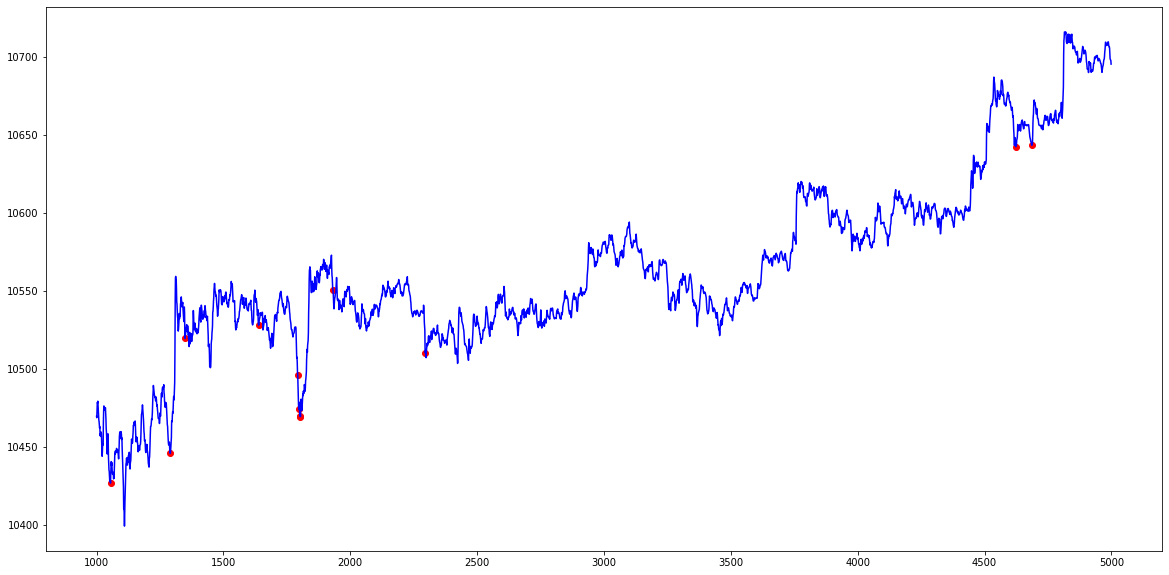

In [42]:
import matplotlib.pyplot as plt
plt.clf()

plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [43]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()